In [56]:
from aocd.models import Puzzle

puzzle = Puzzle(year=2023, day=10)

def parses(input):
    table = str.maketrans("|-JL7F.", "│─┘└┐┌ ")
    return [list(line.translate(table)) for line in input.strip().split('\n')]

data = parses(puzzle.input_data)

In [57]:
def printmap(data, pos=None):
    print('\n'.join([''.join([c if i+j*1j != pos else 'X' 
                     for j, c in enumerate(line)]) 
            for i, line in enumerate(data)]))

In [58]:
sample = parses("""-L|F7
7S-7|
L|7||
-L-J|
L|-JF""")
printmap(sample)

─└│┌┐
┐S─┐│
└│┐││
─└─┘│
└│─┘┌


In [59]:
sample2 = parses("""7-F7-
.FJ|7
SJLL7
|F--J
LJ.LJ
""")
printmap(sample2)

┐─┌┐─
 ┌┘│┐
S┘└└┐
│┌──┘
└┘ └┘


In [67]:
DIRECTIONS = { # map of tile, to exit directions
    '│': [1,-1],
    '─': [1j,-1j],
    '┘': [-1j, -1],
    '└': [1j,-1],
    '┐': [-1j,1],
    '┌': [1j,1],
}

In [318]:
def find_boundary(data):
    # first dim is vertical, second horizontal
    exits = {}
    for tile, (d1, d2) in DIRECTIONS.items():
        exits[tile, -d1] = d2
        exits[tile, -d2] = d1
    
    # build map
    map_ = {}
    for i, row in enumerate(data):
        for j, val in enumerate(row):
            if val != ' ':
                map_[i + 1j*j] = val
            if val == 'S':
                start = i + 1j*j
    
    for direction in [1, -1, 1j, -1j]:
        initial_dir = direction
        current = start
        boundary = {}
        while True:
            neighbor = current + direction

            if neighbor not in map_:
                break
            
            if map_[neighbor] == 'S':
                
                exits_to_tile = {}
                for tile, (d1, d2) in DIRECTIONS.items():
                    exits_to_tile[d1,d2] = tile
                    exits_to_tile[d2,d1] = tile
                start_tile = exits_to_tile[initial_dir, -direction]
                
                boundary[neighbor] = start_tile
                
                return boundary
                
                
            state = (map_[neighbor], direction)

            if (map_[neighbor], direction) not in exits:
                break
            
            current = neighbor
            direction = exits[map_[neighbor], direction]
            boundary[current] = map_[current]
        

In [319]:
def solve_a(data):
    boundary = find_boundary(data)
    return len(boundary) // 2

In [320]:
solve_a(sample)

4

In [321]:
solve_a(sample2)

8

In [322]:
def print_boundary(data, boundary):
    N, M = len(data), len(data[0])
    print('\n'.join((
        ''.join(boundary.get(i+j*1j, ' ') for j in range(M))
        for i in range(N)
    )))

In [323]:
print_boundary(sample4, find_boundary(sample4))

 ┌────┐┌┐┌┐┌┐┌─┐    
 │┌──┐││││││││┌┘    
 ││ ┌┘││││││││└┐    
┌┘└┐└┐└┘└┘││└┘ └─┐  
└──┘ └┐   └┘┌┐┌─┐└┐ 
    ┌─┘  ┌┐┌┘│└┐└┐└┐
    └┐ ┌┐││└┐│ └┐└┐│
     │┌┘└┘│┌┘│┌┐│ └┘
    ┌┘└─┐ ││ ││││   
    └───┘ └┘ └┘└┘   


In [360]:
HIRES = { # map of tile, to exit directions
    '│': [[0,1,0],[0,1,0],[0,1,0]],
    '─': [[0,0,0],[1,1,1],[0,0,0]],
    '┘': [[0,1,0],[1,1,0],[0,0,0]],
    '└': [[0,1,0],[0,1,1],[0,0,0]],
    '┐': [[0,0,0],[1,1,0],[0,1,0]],
    '┌': [[0,0,0],[0,1,1],[0,1,0]],
    ' ': [[0,0,0],[0,0,0],[0,0,0]],
}

In [386]:
data = sample4
boundary = find_boundary(data)
N, M = len(data), len(data[0])

In [387]:
rows = []
for i in range(N):
    blocks = []
    for j in range(M):
        tile = boundary.get(i+1j*j, ' ')
        blocks.append(np.array(HIRES[tile]))
#     print(blocks)
    rows.append(np.hstack(blocks))
map_ = np.vstack(rows)

In [388]:
visited = set([(0,0)])
stack = [(0,0)]

while stack:
    x, y = stack.pop()

    for dx, dy in [(0,1),(0,-1),(1,0),(-1,0)]:
        x2, y2 = x + dx, y + dy
        if not (0 <= x2 < 3*N and 0 <= y2 < 3*M):
            continue
        if (x2,y2) not in visited and map_[x2,y2] == 0:
            visited.add((x2,y2))
            stack.append((x2,y2))

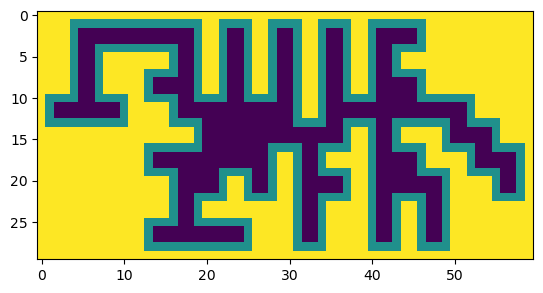

In [389]:
map2 = map_.copy()
for x, y in visited:
    map2[x,y] = 2
plt.imshow(map2)

In [391]:
inside = 0
for i in range(N):
    for j in range(M):
        I, J = 3*i, 3*j
        block = map2[I:I+3,J:J+3]
        if np.all(block == 0):
            inside += 1

In [392]:
print(inside)

8


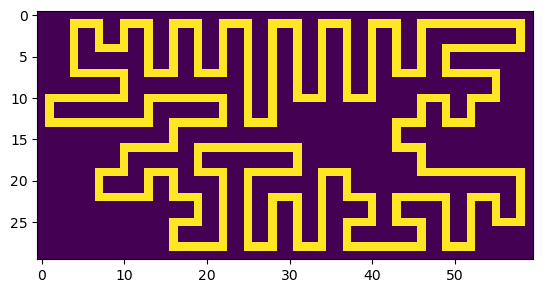

In [369]:
plt.imshow(map_)

In [354]:
sample

[['─', '└', '│', '┌', '┐'],
 ['┐', 'S', '─', '┐', '│'],
 ['└', '│', '┐', '│', '│'],
 ['─', '└', '─', '┘', '│'],
 ['└', '│', '─', '┘', '┌']]

In [32]:
# def solve_a(data):
    
#     enters =  {
#         '│': [1,-1],
#         '─': [1j,-1j],
#         '┘': [1j,1],
#         '└': [-1j,1],
#         '┐': [1j,-1],
#         '┌': [-1j,-1],
#     }
#     new_dir = {}
#     for tile, (enter, enter2) in enters.items():
#         new_dir[tile, enter] = -enter2
#         new_dir[tile, enter2] = -enter
    
#     map_ = {}
#     for i, row in enumerate(data):
#         for j, val in enumerate(row):
#             if val != ' ':
#                 map_[i+1j*j] = val
#             if val == 'S':
#                 start = i + 1j * j
                
    
#     for direction in [1,-1,1j,-1j]:
#         i = 0
#         current = start
# #         print('*'*100)
#         while True:
# #             printmap(data, current)
# #             print(direction)
#             i += 1
            
#             neighbor = current + direction
#             if neighbor not in map_:
# #                 print('no neigh')
#                 break
                
#             if map_[neighbor] == 'S':
#                 return i // 2 
            
#             state = (map_[neighbor], direction)

#             if state not in new_dir:
# #                 print('invalid dir')
#                 break
            
#             current = neighbor
#             direction = new_dir[state]
            
      

In [33]:
# def get_boundary(data):
    
#     enters =  {
#         '│': [1,-1],
#         '─': [1j,-1j],
#         '┘': [1j,1],
#         '└': [-1j,1],
#         '┐': [1j,-1],
#         '┌': [-1j,-1],
#     }
#     new_dir = {}
#     for tile, (enter, enter2) in enters.items():
#         new_dir[tile, enter] = -enter2
#         new_dir[tile, enter2] = -enter
    
#     map_ = {}
#     for i, row in enumerate(data):
#         for j, val in enumerate(row):
#             if val != ' ':
#                 map_[i+1j*j] = val
#             if val == 'S':
#                 start = i + 1j * j
                
    
#     for direction in [1,-1,1j,-1j]:
#         initial_dir = direction
#         i = 0
#         current = start
#         boundary = {}
# #         print('*'*100)
#         while True:
        
# #             printmap(data, current)
# #             print(direction)
#             i += 1
            
#             neighbor = current + direction
#             if neighbor not in map_:
# #                 print('no neigh')
#                 break
                
#             if map_[neighbor] == 'S':
#                 rev_enter = {tuple(v):k for k, v in enters.items()} | {tuple(v[::-1]):k for k, v in enters.items()}
#                 boundary[neighbor] = rev_enter[initial_dir,direction]
#                 return boundary
            
#             state = (map_[neighbor], direction)

#             if state not in new_dir:
# #                 print('invalid dir')
#                 break
            
#             current = neighbor
#             direction = new_dir[state]
            
#             boundary[current] = map_[current]
      

# def solve_b(data):
    
#     exits =  {
#         '│': [1,-1],
#         '─': [1j,-1j],
#         '┘': [-1j,-1],
#         '└': [1j,-1],
#         '┐': [-1j,1],
#         '┌': [1j,1],
#     }
    
#     map_ = {}f
#     for i, row in enumerate(data):
#         for j, val in enumerate(row):
#             map_[i+1j*j] = val

#     N, M = len(data), len(data[0])
#     boundary = get_boundary(data) 
#     visited = set()
#     N, M = len(data), len(data[0])

#     stack = (
#     [0+j*1j for j in range(M)] + 
#     [N-1+j*1j for j in range(M)] + 
#     [i for i in range(N)] + 
#     [i+(M-1)*1j for i in range(N)] 
#     )
    
#     while stack:
#         pos = stack.pop()
#         if pos in boundary:
#             dirs = exits[boundary[pos]]
#         else:
#             dirs = (1,-1,1j,-1j)
#         for d in dirs:
#             neigh = pos + d
#             if neigh not in map_ or neigh in visited:
#                 continue
#             if d in (1,-1) and boundary.get(neigh, None) == '─':
#                 continue
#             if d in (1j,-1j) and boundary.get(neigh, None) == '│':
#                 continue
#             visited.add(neigh)
#             stack.append(neigh)
    
#     V = [['X' if i+j*1j in visited else ' ' for j, val in enumerate(row)] for i, row in enumerate(data)  ]
#     print('\n'.join([''.join(row) for row in V]))
#     inside = 0
#     for i, row in enumerate(data):
#         for j, val in enumerate(row):
#             s = i+1j*j
#             if s in visited:
#                 continue
#             for d in (1,-1,1j,-1j):
#                 if s+d not in map_:
#                     break
#                 if s+d in visited and s+d not in boundary:
#                     break
#             else:
#                 inside += 1
#     return inside
# #     return N * M - len(visited)
        

In [51]:
sample3 = parses("""...........
.S-------7.
.|F-----7|.
.||.....||.
.||.....||.
.|L-7.F-J|.
.|..|.|..|.
.L--J.L--J.
...........""")
printmap(sample3)

           
 S───────┐ 
 │┌─────┐│ 
 ││     ││ 
 ││     ││ 
 │└─┐ ┌─┘│ 
 │  │ │  │ 
 └──┘ └──┘ 
           


In [53]:
sample4 = parses(""".F----7F7F7F7F-7....
.|F--7||||||||FJ....
.||.FJ||||||||L7....
FJL7L7LJLJ||LJ.L-7..
L--J.L7...LJS7F-7L7.
....F-J..F7FJ|L7L7L7
....L7.F7||L7|.L7L7|
.....|FJLJ|FJ|F7|.LJ
....FJL-7.||.||||...
....L---J.LJ.LJLJ...""")
printmap(sample4)

 ┌────┐┌┐┌┐┌┐┌─┐    
 │┌──┐││││││││┌┘    
 ││ ┌┘││││││││└┐    
┌┘└┐└┐└┘└┘││└┘ └─┐  
└──┘ └┐   └┘S┐┌─┐└┐ 
    ┌─┘  ┌┐┌┘│└┐└┐└┐
    └┐ ┌┐││└┐│ └┐└┐│
     │┌┘└┘│┌┘│┌┐│ └┘
    ┌┘└─┐ ││ ││││   
    └───┘ └┘ └┘└┘   


In [54]:
sample5 = parses("""FF7FSF7F7F7F7F7F---7
L|LJ||||||||||||F--J
FL-7LJLJ||||||LJL-77
F--JF--7||LJLJ7F7FJ-
L---JF-JLJ.||-FJLJJ7
|F|F-JF---7F7-L7L|7|
|FFJF7L7F-JF7|JL---7
7-L-JL7||F7|L7F-7F7|
L.L7LFJ|||||FJL7||LJ
L7JLJL-JLJLJL--JLJ.L""")
printmap(sample5)

┌┌┐┌S┌┐┌┐┌┐┌┐┌┐┌───┐
└│└┘││││││││││││┌──┘
┌└─┐└┘└┘││││││└┘└─┐┐
┌──┘┌──┐││└┘└┘┐┌┐┌┘─
└───┘┌─┘└┘ ││─┌┘└┘┘┐
│┌│┌─┘┌───┐┌┐─└┐└│┐│
│┌┌┘┌┐└┐┌─┘┌┐│┘└───┐
┐─└─┘└┐││┌┐│└┐┌─┐┌┐│
└ └┐└┌┘│││││┌┘└┐││└┘
└┐┘└┘└─┘└┘└┘└──┘└┘ └


In [55]:
print_boundary(sample5, find_boundary(sample5))

 ┌┐┌┐┌┐┌┐┌┐┌┐┌┐┌───┐
 │└┘││││││││││││┌──┘
 └─┐└┘└┘││││││└┘└─┐ 
┌──┘┌──┐││└┘└┘ ┌┐┌┘ 
└───┘┌─┘└┘    ┌┘└┘  
   ┌─┘┌───┐   └┐    
  ┌┘┌┐└┐┌─┘┌┐  └───┐
  └─┘└┐││┌┐│└┐┌─┐┌┐│
     ┌┘│││││┌┘└┐││└┘
     └─┘└┘└┘└──┘└┘  


In [131]:
# def solve_b(data):
#     N, M = len(data), len(data[0])
#     boundary = find_boundary(data)
    
#     outside = set(
#         [i for i in range(N)] +
#         [i+(M-1)*1j for i in range(N)] +
#         [1j*j for j in range(M)] +
#         [N-1+1j*j for j in range(M)]
#     )    
#     visited = outside
    
#     all_inside = []
#     for i in range(1,N-1):
#         for j in range(1,M-1):
#             pos = i+1j*j
#             if pos in visited:
#                 continue
            
#             component = [pos]
#             inside = True
#             stack = [pos]
#             visited.add(pos)
#             while stack:
#                 pos = stack.pop()

#                 if pos in boundary: 
#                     deltas = DIRECTIONS[boundary[pos]]
#                 else:
#                     deltas = [1,-1,1j,-1j]
                
#                 for delta in deltas:
#                     neigh = pos + delta
#                     if neigh in outside:
#                         inside = False
#                     if neigh not in visited:
#                         visited.add(neigh)
#                         stack.append(neigh)
#                         component.append(neigh)
#             if inside:
#                 all_inside += list(set(component)-set(boundary))
                
#     map_ = []
#     for i in range(N):
#         row = []
#         for j in range(M):
#             pos = i + 1j * j
#             if pos in boundary:
                
#     return len(all_inside)

In [154]:
pos = 1j

In [156]:
pos.imag

1.0

In [302]:
def print_inside(boundary, inside, N, M):
    map_ = ''
    for i in range(N):
        for j in range(M):
            pos = i + 1j*j
#             if pos in boundary:
#                 c = boundary[pos]
#             elif pos in inside:
#                 c = '#'
#             else:
#                 c = ' '
            if pos in inside:
                
                c = 'X'
            elif pos in boundary:
                c = boundary[pos]
                
            else:
                c = ' '
            map_ += c
        map_ += '\n'
    print(map_)
    with open('/tmp/a.txt', 'w') as f:
        print(map_, file=f)

In [ ]:
def solve_b(data):
    
    boundary = find_boundary(data)
    

In [303]:
def solve_b(data):
    N, M = len(data), len(data[0])
    boundary = find_boundary(data)
    
    outside = set(
        [i-1j for i in range(N)] +
        [i+(M)*1j for i in range(N)] +
        [1j*j-1 for j in range(M)] +
        [N+1j*j for j in range(M)]
    )    
    
    visited = outside.copy()
    real_inside = set()
    
    for i in range(N):
        for j in range(M):
            
            pos = i+1j*j
            
            if pos in visited:
                continue
                
            stack = [pos]
            non_boundary = set([pos])
            inside = True
            current_visit = set([pos])
            
            init = pos
            
            while stack:

                pos = stack.pop()            
                if init == 2+3j:
                    
                    print_inside(boundary, current_visit, N, M)
                    print(inside, current_visit)

                if pos in boundary: 
                    deltas = DIRECTIONS[boundary[pos]]
                else:
                    deltas = [1,-1,1j,-1j]
                    
                for delta in deltas:
                    neigh = pos + delta
                    
                    if neigh not in boundary:
                        non_boundary.add(neigh)
                        
                    if neigh in outside:
                        inside = False
                    
                    if neigh not in current_visit and neigh not in outside:
                        current_visit.add(neigh)
                        stack.append(neigh)
            if inside:
                real_inside |= non_boundary
            else:
                outside |= non_boundary
            visited |= current_visit
    
    print_inside(boundary, real_inside, N, M)
    return len(real_inside)
    

In [304]:
printmap(sample3)

           
 S───────┐ 
 │┌─────┐│ 
 ││     ││ 
 ││     ││ 
 │└─┐ ┌─┘│ 
 │  │ │  │ 
 └──┘ └──┘ 
           


In [305]:
solve_b(sample3)

           
 ┌───────┐ 
 │┌─────┐│ 
 ││     ││ 
 ││     ││ 
 │└─┐ ┌─┘│ 
 │XX│ │XX│ 
 └──┘ └──┘ 
           



4

In [306]:
printmap(sample4, 2+3j)

 ┌────┐┌┐┌┐┌┐┌─┐    
 │┌──┐││││││││┌┘    
 ││X┌┘││││││││└┐    
┌┘└┐└┐└┘└┘││└┘ └─┐  
└──┘ └┐   └┘S┐┌─┐└┐ 
    ┌─┘  ┌┐┌┘│└┐└┐└┐
    └┐ ┌┐││└┐│ └┐└┐│
     │┌┘└┘│┌┘│┌┐│ └┘
    ┌┘└─┐ ││ ││││   
    └───┘ └┘ └┘└┘   


In [307]:
solve_b(sample4)

 ┌────┐┌┐┌┐┌┐┌─┐    
 │┌──┐││││││││┌┘    
 ││X┌┘││││││││└┐    
┌┘└┐└┐└┘└┘││└┘ └─┐  
└──┘ └┐   └┘┌┐┌─┐└┐ 
    ┌─┘  ┌┐┌┘│└┐└┐└┐
    └┐ ┌┐││└┐│ └┐└┐│
     │┌┘└┘│┌┘│┌┐│ └┘
    ┌┘└─┐ ││ ││││   
    └───┘ └┘ └┘└┘   

True {(2+3j)}
 ┌────┐┌┐┌┐┌┐┌─┐    
 │┌X─┐││││││││┌┘    
 │XXX┘││││││││└┐    
┌┘└X└┐└┘└┘││└┘ └─┐  
└──┘ └┐   └┘┌┐┌─┐└┐ 
    ┌─┘  ┌┐┌┘│└┐└┐└┐
    └┐ ┌┐││└┐│ └┐└┐│
     │┌┘└┘│┌┘│┌┐│ └┘
    ┌┘└─┐ ││ ││││   
    └───┘ └┘ └┘└┘   

True {(2+2j), (1+3j), (2+3j), (3+3j), (2+4j)}
 ┌────┐┌┐┌┐┌┐┌─┐    
 │XX─┐││││││││┌┘    
 │XXX┘││││││││└┐    
┌┘XX└┐└┘└┘││└┘ └─┐  
└──┘ └┐   └┘┌┐┌─┐└┐ 
    ┌─┘  ┌┐┌┘│└┐└┐└┐
    └┐ ┌┐││└┐│ └┐└┐│
     │┌┘└┘│┌┘│┌┐│ └┘
    ┌┘└─┐ ││ ││││   
    └───┘ └┘ └┘└┘   

True {(1+2j), (2+2j), (3+2j), (1+3j), (2+3j), (3+3j), (2+4j)}
 ┌────┐┌┐┌┐┌┐┌─┐    
 │XX─┐││││││││┌┘    
 │XXX┘││││││││└┐    
┌┘XX└┐└┘└┘││└┘ └─┐  
└──┘ └┐   └┘┌┐┌─┐└┐ 
    ┌─┘  ┌┐┌┘│└┐└┐└┐
    └┐ ┌┐││└┐│ └┐└┐│
     │┌┘└┘│┌┘│┌┐│ └┘
    ┌┘└─┐ ││ ││││   
    └───┘ └┘ └┘└┘   

True {(1+2j), (2+2j), (3+2j), (1+3

10

In [308]:
solve_b(sample5)

 ┌┐┌┐┌┐┌┐┌┐┌┐┌┐┌───┐
 │└┘││││││││││││┌──┘
 └─┐└┘└┘││││││└┘└─┐ 
┌──┘┌──┐││└┘└┘X┌┐┌┘ 
└───┘┌─┘└┘XXXX┌┘└┘  
   ┌─┘┌───┐XXX└┐    
  ┌┘┌┐└┐┌─┘┌┐XX└───┐
  └─┘└┐││┌┐│└┐┌─┐┌┐│
     ┌┘│││││┌┘└┐││└┘
     └─┘└┘└┘└──┘└┘  



10

In [316]:
# def find_boundary(data):
#     # first dim is vertical, second horizontal
#     exits = {}
#     for tile, (d1, d2) in DIRECTIONS.items():
#         exits[tile, -d1] = d2
#         exits[tile, -d2] = d1
    
#     # build map
#     map_ = {}
#     for i, row in enumerate(data):
#         for j, val in enumerate(row):
#             if val != ' ':
#                 map_[i + 1j*j] = val
#             if val == 'S':
#                 start = i + 1j*j
    
#     for direction in [1, -1, 1j, -1j]:
#         initial_dir = direction
#         current = start
#         boundary = []
#         while True:
#             neighbor = current + direction

#             if neighbor not in map_:
#                 break
            
#             if map_[neighbor] == 'S':
                
#                 exits_to_tile = {}
#                 for tile, (d1, d2) in DIRECTIONS.items():
#                     exits_to_tile[d1,d2] = tile
#                     exits_to_tile[d2,d1] = tile
#                 start_tile = exits_to_tile[initial_dir, -direction]
                
# #                 boundary[neighbor] = start_tile
#                 boundary.insert(0, (neighbor, start_tile, direction))
                
#                 return boundary
                
                
#             state = (map_[neighbor], direction)

#             if (map_[neighbor], direction) not in exits:
#                 break
            
#             current = neighbor
#             direction = exits[map_[neighbor], direction]
#             boundary.append((current, map_[current], direction))
        

In [317]:
# find_boundary(sample)

In [ ]:
# ADJACENT = { # map of tile, to exit directions
#     ('│', -1): [-1j] ,
#     ('│', 1): [1j] ,
#     ('─', 1j): [-1] ,
#     ('─', -1j): [1] ,
#     ('┘', -1):  ,
#     ('└', ): ,
#     ('┐', ): ,
#     ('┌', ): ,
# }